# image labelling code
developing code for automatic / quick image labelling


i have discovered using the terminal is a nightmare to do labelling, so i will copy someone else who has already made a program to label in jupyter notebook.

In [43]:
import numpy as np
import pandas as pd
import os
from PIL import Image
from glob import glob
import csv
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

first of all 

In [56]:
## directory of set of images i would like to label + corresponding csv to populate
folder_path = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/test_random_sample/'

# open csv quickly to check it is correct + in the format we expect
csv_file_name = 'test_random_sample_updated'
saving_csv_name = csv_file_name+'_updated.csv'
csv_full_path = os.path.join(folder_path,csv_file_name+'.csv')
csv_read_pd = pd.read_csv(csv_full_path)
csv_read_pd

,image_name,number_label
0,1749002_23ch1,3.0
1,686358_20ch0,6.0
2,603096_19ch0,0.0
3,57384_26ch1,1.0
4,2625944_25ch1,NaN
5,507664_25ch0,NaN
6,1718292_20ch0,NaN
7,1450139_23ch0,NaN
8,305596_20ch0,NaN
9,1275727_25ch0,NaN


1450139_23ch0


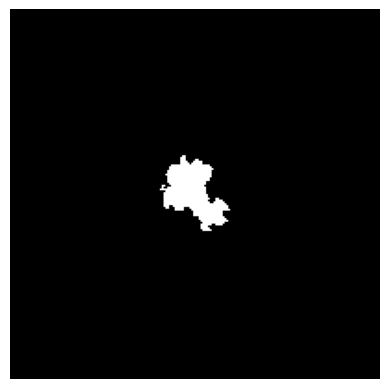

Enter a label (0-9, or 'stop' to quit):  no


not words, what are you doing???


Enter a label (0-9, or 'stop' to quit):  no


not words, what are you doing???


Enter a label (0-9, or 'stop' to quit):  stop


Stopped labeling.
test_random_sample_updated_updated.csv saved!


SystemExit: 

/opt/jaspy/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [57]:
# function to ensure all images are captured + save the new csv
def saving_function(new_images, new_labels, og_df_name_list):
    if len(new_images) < len(og_df_name_list):
        not_labelled = list(set(og_df_name_list) - set(new_images))
        new_images.extend(not_labelled)  # Modifies the list in place
        new_labels.extend([np.nan] * len(not_labelled))

    new_csv_dic = {'image_name': new_images, 'number_label':new_labels}
    df = pd.DataFrame(new_csv_dic)
    df.to_csv(full_save_csv_path, index=False)
    print(f'{saving_csv_name} saved!')
    return df

# some things need to be defined before starting the processing loop
image_name_lst = []
new_image_label_lst = []
all_image_names = list(csv_read_pd['image_name'])
full_save_csv_path = os.path.join(folder_path,saving_csv_name)


with open(csv_full_path, mode='r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)  # Read the header row
    # loop through each row
    for row in csv_reader:
        image_name = row[0]
        label = row[1]        
        
        # label returns false for nan, so will just write names / labels aleady there
        if label: 
            #num = int(label) # convert to number (corresponding to label)
            image_name_lst.append(image_name)
            new_image_label_lst.append(num)
                
        ## if is a nan, will follow this loop for labelling
        else:
            print(image_name)
            im = Image.open(os.path.join(folder_path, image_name + '.png'))
            plt.imshow(im)
            plt.axis('off')
            plt.show()
            while True: # loop will continue until a valid entry is passed
                inp = input("Enter a label (0-9, or 'stop' to quit): ") ## label of image

                ## if write 'stop' will stop labelling + save what has been done
                if inp.lower() == 'stop':
                    print("Stopped labeling.")
                    done_images = saving_function(image_name_lst,new_image_label_lst,all_image_names)
                    raise SystemExit  # Exit gracefully
                
                try:
                    num = int(inp) # convert to number (corresponding to label)
                    if 0 <= num <= 9:  # Check if the number is in the valid range
                        clear_output(wait=True) # get rid of image once you've labelled it
                        image_name_lst.append(image_name)
                        new_image_label_lst.append(num)
                        break  # Exit the loop if the input is valid
                    else:
                        print("Error: Label must be between 0 and 9.")
                except ValueError: # if we don't input a number -> stop labelling, so will break
                    print("not words, what are you doing???")
                    
                    
done_images = saving_function(image_name_lst,new_image_label_lst,all_image_names)

In [58]:
done_images
#df.to_csv(csv_file_list[0], index=False) 

,image_name,number_label
0,1749002_23ch1,1.0
1,686358_20ch0,1.0
2,603096_19ch0,1.0
3,57384_26ch1,1.0
4,2625944_25ch1,3.0
5,507664_25ch0,6.0
6,1718292_20ch0,2.0
7,305596_20ch0,NaN
8,1275727_25ch0,NaN
9,1450139_23ch0,NaN
